<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-01-29 20:38:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-01-29 20:38:07 (13.5 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head(30)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male
7,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male
8,10,10,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following packages will be UPDATED:

    seaborn: 0.8.0-py35h15a2772_0 --> 0.9.0-py35_0 anaconda

seaborn-0.9.0- 100% |################################| Time: 0:00:00  51.29 MB/s


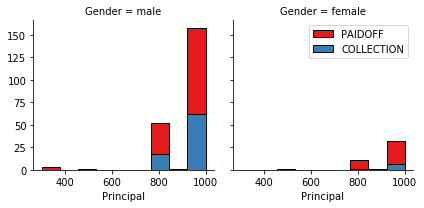

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

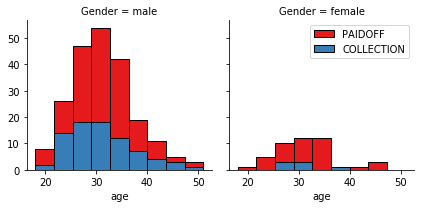

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

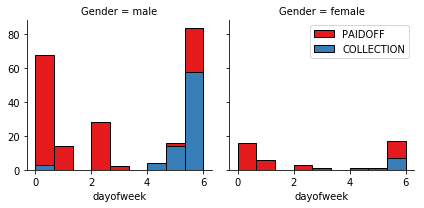

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [30]:
Klim=10
mean_acc = np.zeros((Klim-1))
std_acc = np.zeros((Klim-1))
for k in range(1,Klim):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    from sklearn import metrics
    print("Train set Accuracy for ",k,":", metrics.accuracy_score(y_train, neigh.predict(X_train)))
    print("Test set Accuracy for ",k,":", metrics.accuracy_score(y_test, yhat))
    
print(mean_acc)

Train set Accuracy for  1 : 0.894927536232
Test set Accuracy for  1 : 0.671428571429
Train set Accuracy for  2 : 0.822463768116
Test set Accuracy for  2 : 0.657142857143
Train set Accuracy for  3 : 0.833333333333
Test set Accuracy for  3 : 0.714285714286
Train set Accuracy for  4 : 0.815217391304
Test set Accuracy for  4 : 0.685714285714
Train set Accuracy for  5 : 0.815217391304
Test set Accuracy for  5 : 0.757142857143
Train set Accuracy for  6 : 0.800724637681
Test set Accuracy for  6 : 0.714285714286
Train set Accuracy for  7 : 0.807971014493
Test set Accuracy for  7 : 0.785714285714
Train set Accuracy for  8 : 0.797101449275
Test set Accuracy for  8 : 0.757142857143
Train set Accuracy for  9 : 0.789855072464
Test set Accuracy for  9 : 0.757142857143
[ 0.67142857  0.65714286  0.71428571  0.68571429  0.75714286  0.71428571
  0.78571429  0.75714286  0.75714286]


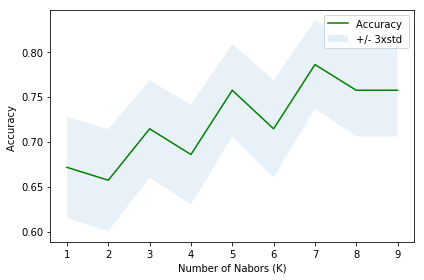

In [31]:
plt.plot(range(1,Klim),mean_acc,'g')
plt.fill_between(range(1,Klim),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [32]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [33]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [34]:

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.807971014493
Test set Accuracy:  0.785714285714


# Decision Tree

In [35]:
# No need to reimport train_test_split, I still leave it there as a reminder of what libraries we are using
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (207, 8) (207,)
Test set: (139, 8) (139,)


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [38]:
print(X_trainset.shape,y_trainset.shape)

(242, 8) (242,)


In [39]:
print(X_testset.shape,y_testset.shape)

(104, 8) (104,)


In [40]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
predTree = drugTree.predict(X_testset)

In [43]:
print (predTree [0:20])
print (y_testset[0:20])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'COLLECTION']


In [44]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.653846153846


In [45]:
# your code here
l=len(predTree)

t=0
for i in range(0,l):
    if predTree[i]==y_testset[i]:
        t=t+1
    
print('Total coincidences : ', t, ' //  Total values : ', l, '  //   Sucess Rate : ', t/l)

Total coincidences :  68  //  Total values :  104   //   Sucess Rate :  0.6538461538461539


# Support Vector Machine

In [46]:
# Change the categorical bynary values to 0 or 1
y2=df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1])
X_train, X_test, y_train, y_test = train_test_split( X, y2, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (207, 8) (207,)
Test set: (139, 8) (139,)


In [47]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid',gamma='auto')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          0       0.72      0.92      0.81       102
          1       0.00      0.00      0.00        37

avg / total       0.53      0.68      0.59       139

Confusion matrix, without normalization
[[94  8]
 [37  0]]


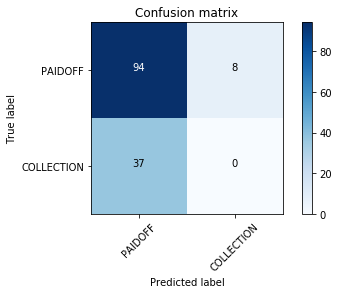

In [51]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [52]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.59208941859388031

In [53]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.67625899280575541

# Logistic Regression

In [54]:
# Change the categorical values to 0 or 1
y2=df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1])
y2.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y2, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (207, 8) (207,)
Test set: (139, 8) (139,)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [59]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[ 0.52,  0.48],
       [ 0.55,  0.45],
       [ 0.66,  0.34],
       [ 0.63,  0.37],
       [ 0.65,  0.35],
       [ 0.66,  0.34],
       [ 0.53,  0.47],
       [ 0.54,  0.46],
       [ 0.63,  0.37],
       [ 0.52,  0.48],
       [ 0.64,  0.36],
       [ 0.52,  0.48],
       [ 0.69,  0.31],
       [ 0.64,  0.36],
       [ 0.57,  0.43],
       [ 0.7 ,  0.3 ],
       [ 0.5 ,  0.5 ],
       [ 0.66,  0.34],
       [ 0.51,  0.49],
       [ 0.66,  0.34],
       [ 0.55,  0.45],
       [ 0.52,  0.48],
       [ 0.51,  0.49],
       [ 0.53,  0.47],
       [ 0.57,  0.43],
       [ 0.51,  0.49],
       [ 0.51,  0.49],
       [ 0.6 ,  0.4 ],
       [ 0.51,  0.49],
       [ 0.7 ,  0.3 ],
       [ 0.54,  0.46],
       [ 0.53,  0.47],
       [ 0.54,  0.46],
       [ 0.53,  0.47],
       [ 0.59,  0.41],
       [ 0.55,  0.45],
       [ 0.51,  0.49],
       [ 0.68,  0.32],
       [ 0.54,  0.46],
       [ 0.56,  0.44],
       [ 0.51,  0.49],
       [ 0.65,  0.35],
       [ 0.56,  0.44],
       [ 0.

In [60]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.71223021582733814

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 0 37]
 [ 3 99]]


Confusion matrix, without normalization
[[ 0 37]
 [ 8 94]]


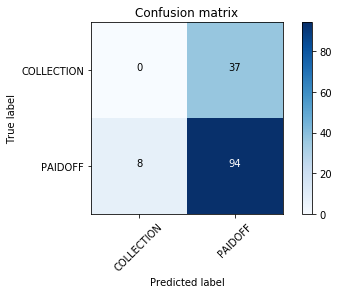

In [129]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION','PAIDOFF'],normalize= False,  title='Confusion matrix')

In [62]:
print (classification_report(y_test, yhat))


             precision    recall  f1-score   support

          0       0.73      0.97      0.83       102
          1       0.00      0.00      0.00        37

avg / total       0.53      0.71      0.61       139



In [63]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.58147412815688471

# Model Evaluation using Test set

In [64]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [65]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-01-29 20:45:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-01-29 20:45:25 (494 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [66]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [67]:
test_df.shape

(54, 10)

In [68]:
test_df['effective_date']=pd.to_datetime(test_df['effective_date'])
test_df['due_date']=pd.to_datetime(test_df['due_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [69]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0


In [70]:
# I do this now so I don't have to modify the data for logloss
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)


In [71]:
test_df.head(8)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,0,1000,30,2016-09-08,2016-10-07,50,Bechalor,1
1,5,5,0,300,7,2016-09-09,2016-09-15,35,Master or Above,0
2,21,21,0,1000,30,2016-09-10,2016-10-09,43,High School or Below,1
3,24,24,0,1000,30,2016-09-10,2016-10-09,26,college,0
4,35,35,0,800,15,2016-09-11,2016-09-25,29,Bechalor,0
5,37,37,0,700,15,2016-09-11,2016-09-25,33,High School or Below,0
6,38,38,0,1000,15,2016-09-11,2016-09-25,24,college,0
7,48,48,0,1000,30,2016-09-11,2016-10-10,32,Bechalor,0


In [72]:
Feature = test_df
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,Bechalor,High School or Below,Master or Above,college
0,1,1,0,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,1,0,0,0
1,5,5,0,300,7,2016-09-09,2016-09-15,35,Master or Above,0,0,0,1,0
2,21,21,0,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,0,1,0,0
3,24,24,0,1000,30,2016-09-10,2016-10-09,26,college,0,0,0,0,1
4,35,35,0,800,15,2016-09-11,2016-09-25,29,Bechalor,0,1,0,0,0


In [73]:
Feature=Feature.drop(['education'], axis = 1)
Feature.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,Gender,Bechalor,High School or Below,Master or Above,college
0,1,1,0,1000,30,2016-09-08,2016-10-07,50,1,1,0,0,0
1,5,5,0,300,7,2016-09-09,2016-09-15,35,0,0,0,1,0
2,21,21,0,1000,30,2016-09-10,2016-10-09,43,1,0,1,0,0
3,24,24,0,1000,30,2016-09-10,2016-10-09,26,0,0,0,0,1
4,35,35,0,800,15,2016-09-11,2016-09-25,29,0,1,0,0,0


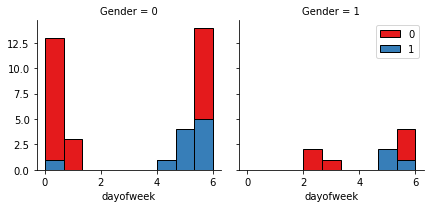

In [74]:
Feature['dayofweek'] = Feature['effective_date'].dt.dayofweek
bins = np.linspace(Feature.dayofweek.min(), Feature.dayofweek.max(), 10)
g = sns.FacetGrid(Feature, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [75]:
Feature['weekend'] = Feature['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
Feature.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,Gender,Bechalor,High School or Below,Master or Above,college,dayofweek,weekend
0,1,1,0,1000,30,2016-09-08,2016-10-07,50,1,1,0,0,0,3,0
1,5,5,0,300,7,2016-09-09,2016-09-15,35,0,0,0,1,0,4,1
2,21,21,0,1000,30,2016-09-10,2016-10-09,43,1,0,1,0,0,5,1
3,24,24,0,1000,30,2016-09-10,2016-10-09,26,0,0,0,0,1,5,1
4,35,35,0,800,15,2016-09-11,2016-09-25,29,0,1,0,0,0,6,1


In [76]:
# list of the independant variables we will ommit some as 'Master or above' and 'Bechalor'
X=Feature[['Principal','terms','age','Gender','High School or Below', 'college', 'dayofweek', 'weekend']]
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.49,  0.93,  3.06,  1.98, -0.8 , -0.86, -0.29, -1.3 ],
       [-3.56, -1.7 ,  0.53, -0.51, -0.8 , -0.86,  0.1 ,  0.77],
       [ 0.49,  0.93,  1.88,  1.98,  1.25, -0.86,  0.49,  0.77],
       [ 0.49,  0.93, -0.98, -0.51, -0.8 ,  1.16,  0.49,  0.77],
       [-0.67, -0.79, -0.48, -0.51, -0.8 , -0.86,  0.87,  0.77]])

In [77]:
y = Feature['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [78]:
X.shape

(54, 8)

In [79]:
y.shape

(54,)

## Data is processed

### KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [238]:
# We will use a test size of 40%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (32, 8) (32,)
Test set: (22, 8) (22,)


In [239]:
# We will test the accuracy of KNN with values of k up to 20
Klim=20
mean_acc = np.zeros((Klim-1))
std_acc = np.zeros((Klim-1))
for k in range(1,Klim):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    from sklearn import metrics
    print("Train set Accuracy for ",k,":", metrics.accuracy_score(y_train, neigh.predict(X_train)))
    print("Test set Accuracy for ",k,":", metrics.accuracy_score(y_test, yhat))
    
print(mean_acc)

Train set Accuracy for  1 : 1.0
Test set Accuracy for  1 : 0.454545454545
Train set Accuracy for  2 : 0.9375
Test set Accuracy for  2 : 0.681818181818
Train set Accuracy for  3 : 0.84375
Test set Accuracy for  3 : 0.590909090909
Train set Accuracy for  4 : 0.875
Test set Accuracy for  4 : 0.727272727273
Train set Accuracy for  5 : 0.8125
Test set Accuracy for  5 : 0.636363636364
Train set Accuracy for  6 : 0.84375
Test set Accuracy for  6 : 0.727272727273
Train set Accuracy for  7 : 0.84375
Test set Accuracy for  7 : 0.681818181818
Train set Accuracy for  8 : 0.78125
Test set Accuracy for  8 : 0.681818181818
Train set Accuracy for  9 : 0.71875
Test set Accuracy for  9 : 0.636363636364
Train set Accuracy for  10 : 0.6875
Test set Accuracy for  10 : 0.727272727273
Train set Accuracy for  11 : 0.71875
Test set Accuracy for  11 : 0.636363636364
Train set Accuracy for  12 : 0.65625
Test set Accuracy for  12 : 0.727272727273
Train set Accuracy for  13 : 0.6875
Test set Accuracy for  13 : 0.7

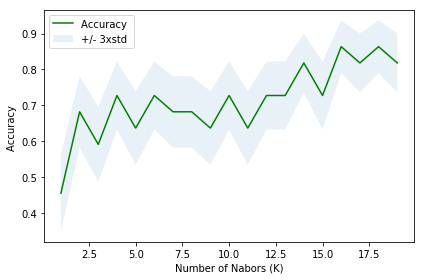

In [240]:
plt.plot(range(1,Klim),mean_acc,'g')
plt.fill_between(range(1,Klim),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [241]:
# Implement KNN with K=4 
neigh = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)

In [242]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 1])

In [243]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.875
Test set Accuracy:  0.727272727273


In [244]:
#Saving the Jaccard score for KNN
from sklearn.metrics import jaccard_similarity_score
JKNN=jaccard_similarity_score(y_test, yhat)
JKNN

0.72727272727272729

In [245]:
#Saving the F1 score for KNN
from sklearn.metrics import f1_score
F1KNN=f1_score(y_test, yhat) 
F1KNN

0.0

In [246]:
print(classification_report(y_test, yhat))

             precision    recall  f1-score   support

          0       0.84      0.84      0.84        19
          1       0.00      0.00      0.00         3

avg / total       0.73      0.73      0.73        22



# Decision Tree

In [247]:
# We will use a test size of 40%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (32, 8) (32,)
Test set: (22, 8) (22,)


In [248]:
from sklearn.tree import DecisionTreeClassifier

In [249]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.4, random_state=3)

In [250]:
print(X_trainset.shape,y_trainset.shape)
print(X_testset.shape,y_testset.shape)

(32, 8) (32,)
(22, 8) (22,)


In [251]:
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LoanTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [252]:
LoanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [253]:
predTree = LoanTree.predict(X_testset)

In [254]:
print (predTree [0:20])
print (y_testset[0:20])

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0]
[0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0]


In [255]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.681818181818


In [256]:
# We save the Jaccard score for the decision tree
from sklearn.metrics import jaccard_similarity_score
JDT=jaccard_similarity_score(y_testset, predTree)
JDT

0.68181818181818177

In [257]:
# We save the F1 score for the decision tree
from sklearn.metrics import f1_score
F1DT=f1_score(y_testset, predTree)
F1DT

0.0

# SVM

In [258]:
#No need to change the categorical valued, we already did that
#Test size 40%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (32, 8) (32,)
Test set: (22, 8) (22,)


In [259]:
# sigmoid SVM
from sklearn import svm
clf = svm.SVC(kernel='sigmoid',gamma='auto')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [260]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 1])

In [261]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [262]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          0       0.85      0.89      0.87        19
          1       0.00      0.00      0.00         3

avg / total       0.73      0.77      0.75        22

Confusion matrix, without normalization
[[17  2]
 [ 3  0]]


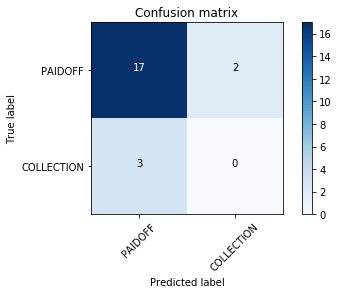

In [263]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [264]:
# We save the F1 score for SVM
from sklearn.metrics import f1_score
F1SVM=f1_score(y_test, yhat, average='weighted') 
F1SVM

0.75291375291375295

In [265]:
# We save the Jaccard score for SVM
from sklearn.metrics import jaccard_similarity_score
JSVM=jaccard_similarity_score(y_testset, predTree)
JSVM

0.68181818181818177

# Logical Regression

In [266]:
# No need to convert categorical into discrete values
# Test size 40%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (32, 8) (32,)
Test set: (22, 8) (22,)


In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [268]:
yhat = LR.predict(X_test)
yhat[0:5]

array([1, 0, 1, 0, 1])

In [269]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[ 0.49,  0.51],
       [ 0.51,  0.49],
       [ 0.47,  0.53],
       [ 0.55,  0.45],
       [ 0.49,  0.51]])

In [270]:
#We save the Jaccard score for Logical Regression
from sklearn.metrics import jaccard_similarity_score
JLR=jaccard_similarity_score(y_test, yhat)
JLR

0.63636363636363635

In [271]:
#We save the F1 score for Logical Regression
from sklearn.metrics import f1_score
F1LR=f1_score(y_test, yhat, average='weighted') 
F1LR

0.68770053475935844

Confusion matrix, without normalization
[[ 1  2]
 [ 6 13]]


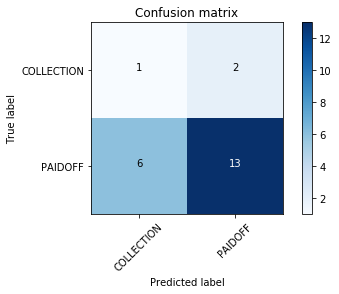

In [272]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION','PAIDOFF'],normalize= False,  title='Confusion matrix')

In [292]:
#We save the LogLoss for Logical Regression
from sklearn.metrics import log_loss
LLLR=log_loss(y_test, yhat_prob)
LLLR

0.66689571928889479

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [294]:
# We create the desired dataframe
Dict = {'Algorithm': ['KNN','Decision Tree','SVM','LogicalRegression'],'Jaccard': [JKNN,JDT,JSVM,JLR], 'F1-score':[F1KNN,F1DT,F1SVM,F1LR],'LogLoss':['NA','NA','NA',LLLR]}
MLrep=pd.DataFrame(data=Dict)
print('These results were obtained for with a test size of 40%')
MLrep


These results were obtained for with a test size of 40%


,Algorithm,F1-score,Jaccard,LogLoss
0,KNN,0.000000,0.727273,NA
1,Decision Tree,0.000000,0.681818,NA
2,SVM,0.752914,0.681818,NA
3,LogicalRegression,0.687701,0.636364,0.666896


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>